In [20]:
#import os
#os.environ['PYSYN_CDBS'] = "C:/Users/tchawla/research/HST_data/grp/redcat/trds"
#env_var = os.environ['PYSYN_CDBS']
#env_var
import numpy as np
from astropy.io import ascii
from pylab import *
from astropy.table import Table, vstack
import pandas as pd
from expecto import get_spectrum
from scipy.interpolate import RegularGridInterpolator as rgi
from itertools import product
%run Interpolate_final.ipynb
%run GetSpectra_final.ipynb
%run Binning_final.ipynb
%run AddNoise_final.ipynb
#%set_env PYSYN_CDBS = C:/Users/tchawla/research/HST_data/grp/redcat/trds

In [2]:
#env_var

In [3]:
#PYSYN_CDBS

In [4]:
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

'''
reads in .dat files. col1 is wavelength, col2 is transmission. Files are labeled with water content level in mm 
water content levels are listed in the array above. resolution is 200,000.
'''

d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1

In [5]:
'''
for loop creates transmission values in shape necessary for interpolation function
'''
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

flux_array = []
i=0
for n in water_array:
    water_array_i = str(water_array[i])
    d["flux"+water_array_i] = np.array(d["data"+water_array_i+"_pd"]["col2"])
    flux_array.append(d["flux"+water_array_i])
    i+=1

In [6]:
pwv = np.load("pwv_target.npy")

In [7]:
spectrum_test10 = spectrum(4000, 10)
spectrum_test5 = spectrum(4000, 5)
spectrum_test1 = spectrum(4000, -1)

KeyboardInterrupt: 

In [ ]:
spectrum_test10_hot = spectrum(7000, 10)
spectrum_test5_hot = spectrum(7000, 5)
spectrum_test1_hot = spectrum(7000, -1)

In [ ]:
print(np.max(spectrum_test10[1]))
print(np.max(spectrum_test5[1]))
print(np.max(spectrum_test1[1]))

In [ ]:
plt.plot(spectrum_test10[0], spectrum_test10[1])

In [ ]:
print(np.max(spectrum_test10_hot[1]))
print(np.max(spectrum_test5_hot[1]))
print(np.max(spectrum_test1_hot[1]))

In [ ]:
plt.plot(spectrum_test10_hot[0], spectrum_test10_hot[1])

In [ ]:
print(len(spectrum_test[0]))
print(len(spectrum_test[1]))

In [ ]:
spec_range = spec_wave_range(spectrum_test, 1.8, 1.95)
spec_range

In [ ]:
flux_norm = diff_spec_v2(4000, 6000, pwv, pwv, 1.8, 1.95, 8, 9)

In [ ]:
plt.plot(flux_norm[0]*10**6)

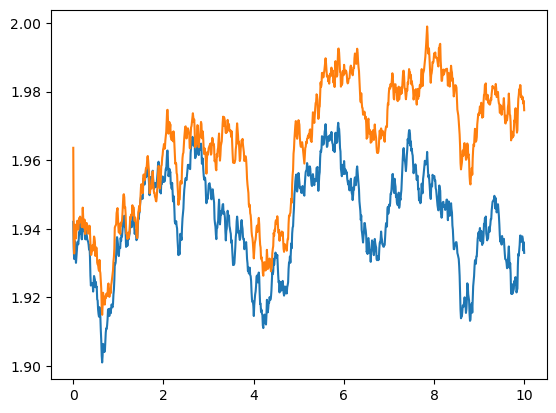

In [9]:
timestamps = np.linspace(0,10,1000) #time in hours
t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

plt.plot(t, target_star_pwv)
plt.plot(t, comparison_star_pwv)
plt.show()


In [ ]:
flux_norm = diff_spec_v2(4000, 6000, target_star_pwv, comparison_star_pwv, 1.8, 1.95, 5, 6)

In [ ]:
plt.plot(flux_norm[0]*10**6)

plt.title("Time Series at 1.8 microns")
plt.ylabel("Change in flux, ppm")
plt.xlabel("time")

In [ ]:
def photon_noise(flux, bin_size, mirror_diameter = 1, exp_time = 60, throughput = .4):
    
    mirror_area = np.pi*((mirror_diameter/2)**2) - np.pi*((.25)**2)
    #print("mirror area:"+str(mirror_area))
    
    #bin_size_array = [bin_array[1]-bin_array[0]]
    '''
    i=0
    for n in bin_array:
        if i == len(bin_array)-1:
            break
        bin_size2 = bin_array[i+1] - bin_array[i]
        bin_size_array.append(bin_size2)
        j+=1
    '''
    num_photons = flux*mirror_area*exp_time*throughput*bin_size
    print("num photons:"+str(num_photons))
    noise_std_dev = 1/(num_photons**(1/2))
    print("noise std dev:"+str(noise_std_dev))
    
    photon_noise_gaussian = np.random.normal(1, noise_std_dev, len(flux))
    
    return photon_noise_gaussian

In [ ]:
flux_array_adjusted = np.array([500*10**4, 2*10**4, .2*10**4])
flux_array = np.array([500, 2, .2])
photon_noise(flux_array, 180)


In [ ]:
#cold_star = spectrum(4000, 5)

In [ ]:
#cold_star

In [ ]:
res_bin_timestamp(cold_star[1], cold_star[0], 200, 18000, 19500)

In [4]:
planet_atm = ascii.read("planet_atm_spec.dat")
planet_atm

col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64
0.6,781.01897,228.61,985626.0,781.019,781.019
0.603,748.76297,225.99,985626.0,748.763,748.763
0.606015,729.26896,222.672,985626.0,729.269,729.269
0.609045075,712.78296,219.442,985626.0,712.783,712.783
0.6120903004,707.96196,216.296,985626.0,707.962,707.962
0.6151507519,726.21895,213.23,985626.0,726.219,726.219
...,...,...,...,...,...
2.318216467,2399.3479,93.9855,985626.0,2399.35,2399.6
2.329807549,2346.2998,94.3186,985626.0,2346.3,2346.46


In [71]:
%run Interpolate_final.ipynb
%run Binning_final.ipynb
%run AddNoise_final.ipynb
%run GetSpectra_final.ipynb

In [34]:
target_spec, ref_spec = diff_spec_v2_pt1(4000, 6000, 6, 7)

In [64]:
ref_spec

(array([  500.  ,   500.1 ,   500.2 , ..., 54999.25, 54999.5 , 54999.75]),
 array([4.96119691e-29, 5.03567076e-29, 5.11123156e-29, ...,
        7.24297854e-03, 7.24032410e-03, 7.24250824e-03]))

In [77]:
'''
function that takes in stellar spectrum, wave range, and res. Output is timeseries of flux based on pwv variability,
one timeseries for each wavelength. 
'''


def binned_flux_pwv_v2(spectrum, pwv_input, wave_in, wave_out, res):
    stellar = spec_wave_range(spectrum, wave_in, wave_out)
    stellar_wave = stellar[0]
    stellar_flux = stellar[1]
    #pwv = np.load("pwv_target.npy")
    
    
    transmission_array = []
    
    i=0
    for n in stellar_wave:
        str_value = str(stellar_wave[i])
        value = stellar_wave[i]/10
        stellar_flux_value = stellar_flux[i]
        transmission  = interpolate_water(pwv_input, value)
        flux = stellar_flux_value*transmission
        d[str_value+"_trans_array"] = np.array(flux)
    
        transmission_array.append(d[str_value+"_trans_array"])
        i+=1
        
    transmission_array = np.array(transmission_array)
    
    #time_array = np.arange(0, 627, 1)
    
    transmission_array_binned = []
    #wave_in_converted = wave_in*1000
    #wave_out_converted = wave_out*1000
    wave_in_converted = wave_in*100
    wave_out_converted = wave_out*100
    
    print(stellar_wave)
    j=0
    for n in time_array:
        
        bin_1 = res_bin_timestamp(transmission_array[:,j], stellar_wave, res, wave_in_converted, wave_out_converted)
        transmission_array_binned.append(bin_1)
        j+=1
    
    return(transmission_array_binned)

In [70]:
#target_binned = binned_flux_pwv_v2(target_spec, target_star_pwv, 1.8, 1.95, 200)

In [75]:
spec_wave_range_test = spec_wave_range(target_spec, 1.8, 1.95)

In [76]:
spec_wave_range_test

(array([18000.  , 18000.03, 18000.06, ..., 19499.91, 19499.94, 19499.97]),
 array([0.60714067, 0.60113144, 0.60075032, ..., 0.51470297, 0.51478081,
        0.51537777]))

In [78]:
stellar_wave = spec_wave_range_test[0]
stellar_flux = spec_wave_range_test[1]
transmission_array = []
    
i=0
for n in stellar_wave:
    str_value = str(stellar_wave[i])
    value = stellar_wave[i]/10
    stellar_flux_value = stellar_flux[i]
    transmission  = interpolate_water(target_star_pwv, value)
    flux = stellar_flux_value*transmission
    d[str_value+"_trans_array"] = np.array(flux)
    
    transmission_array.append(d[str_value+"_trans_array"])
    i+=1
        
transmission_array = np.array(transmission_array)

In [80]:
#transmission_array

In [102]:
'''
tweaked binning function that allows binning at every point in the pwv timeseries
'''

def res_bin_timestamp(flux, wavelength, res, wave_in, wave_fin, spectrum_type="stellar"):
    #print(wavelength)
    #print
    print(flux)
    wave_in = wavelength[0]
    wave_fin = wavelength[-1]
    wave_array = [wave_in]
    n=wave_array[0]
    i=0
    #print(wave_in)
    #print(wave_fin)
    while wave_in <= n <= wave_fin:
        if wave_array[i] >= wave_fin:
            break
        bin_size = wave_array[i]/res
        if wave_array[i]+bin_size >= wave_fin:
            break
        wave_array.append(wave_array[i]+bin_size)
        n=wave_array[i]
        i+=1
    #print(wave_array)
    
    
        
    if spectrum_type == "stellar":
        
        wave_in_index = 0
        wave_out_index = -1
        
        '''
        use this section if using binning function individually and need to specify wave range
        wave_in_index = np.where(wavelength == wave_in*10)[0]
        print(wave_in_index)
        wave_out_index = np.where(wavelength == wave_fin*10)[0]
        print(wave_out_index)
        '''

        wavelength_range = wavelength[wave_in_index:wave_out_index]
        #print(wavelength_range)
        #finds step size of stellar spectrum
        
        high_res_step = [wavelength_range[1]-wavelength_range[0]]
        j=0
        for n in wavelength:
            if j == len(wavelength_range)-1:
                break
            bin_size2 = wavelength_range[j+1] - wavelength_range[j]
            high_res_step.append(bin_size2)
            j+=1
        
        #flux must be multiplied by fractional step size in order to scale it for binning
        #flux = (spectrum.flux.value)*high_res_step
        flux_new = (flux[wave_in_index:wave_out_index])*high_res_step
        #print(high_res_step)
        #print(len(flux_new))
        #print(len(wavelength_range))
        print(len(flux_new))
        
        
    elif spectrum_type == "earth":
        wavelength = spectrum["col1"]
        flux = spectrum["col2"]
    
    #plt.hist(wavelength_range, bins=wave_array, weights=flux_new)
    #plt.show()
    return np.histogram(wavelength_range, bins=wave_array, weights=flux_new)


In [103]:
#transmission_array_np = np.array(transmission_array)
binning_fix = res_bin_timestamp(transmission_array_np[:,0], spec_wave_range_test[0], 200, 18000, 19500)

[0.06381995 0.08870825 0.11699398 ... 0.04247021 0.04444222 0.04646162]
49999


In [101]:
binning_fix

(array([29.01719112, 25.48125519, 17.37855607,  9.05828656,  6.23029781,
         5.26645077,  8.19615132,  4.31013695,  8.26221496, 12.99508845,
         9.55767533,  8.59457496, 10.05860426, 17.16998959, 18.99762041,
        23.7851199 ]),
 array([18000.        , 18090.        , 18180.45      , 18271.35225   ,
        18362.70901125, 18454.52255631, 18546.79516909, 18639.52914493,
        18732.72679066, 18826.39042461, 18920.52237673, 19015.12498862,
        19110.20061356, 19205.75161663, 19301.78037471, 19398.28927659,
        19495.28072297]))

In [109]:
transmission_array_np = np.array(transmission_array)
#len(transmission_array[:,0])
#len(transmission_array[2])
#len(target_star_pwv)
len(transmission_array[0])

1000

In [38]:
#target_spec[0]
diff2 = diff_spec_v2_pt2(target_spec, ref_spec, target_star_pwv, comparison_star_pwv, 1.65, 2.1)

'''
wave in / wave out indexing is having trouble in the timestamp binning function. 
Maybe I don't need indexing? Depending on wave range, maybe I can just take the first and last wave values?
The binning means there is no 2.1 micron value, just 2.099996

'''

"\nwave in / wave out indexing is having trouble in the timestamp binning function. \nMaybe I don't need indexing? Depending on wave range, maybe I can just take the first and last wave values?\nThe binning means there is no 2.1 micron value, just 2.099996\n\n"

In [39]:
#test = np.where()


In [42]:
len(diff2)

48

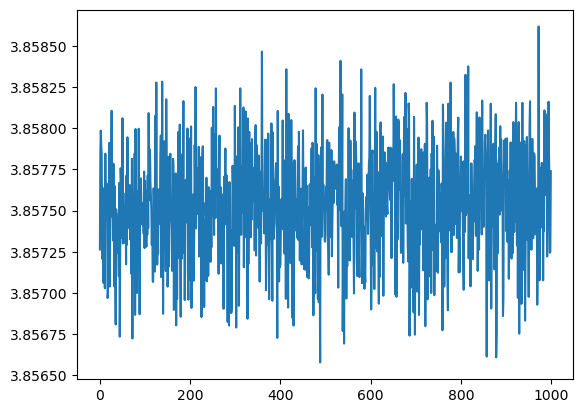

In [45]:
#plt.plot(diff2[0])

In [72]:
diff_spec = diff_spec_v2_pt3(diff2)

In [73]:
len(diff2)

48

In [76]:
#len(diff_spec)
#diff_spec[0]

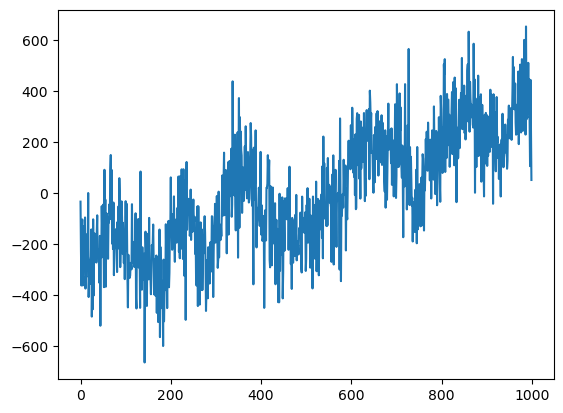

In [92]:
plt.plot(diff_spec[40]*10**6)

In [79]:
bin_array2 = bin_array(1.65, 2.1, 200)

In [93]:
print(bin_array2[40])

2.0143104902032185


In [84]:
#print(diff_spec)